In [1]:
#class for UCB

# entry amount we choose once in a pull
pull_once=50

class UCB:
    def __init__(self,arm_array,delta=0.1,n_best_arms=10,mode="rough",k=5):
        '''
        arm_array is the data matrix we have (in type of np.array)
        delta is the error rate
        n_best_arms is the best arms amount we want
        mode is the calculating result wanted, if it needs to be accurate
        k is the rough range, we can almost make sure every points lays in k*n_best_arms neighbors
        '''
        self.delta=delta
        self.wanted_best_amount=n_best_arms
        self.real_best_amount=0
        self.row=len(arm_array)
        self.col=len(arm_array[0])
        self.data=arm_array
        self.MAX_PULL=int(self.col/pull_once)
        self.threshold=np.inf
        self.best_list=np.array([])
        self.lidx= np.arange(self.row)
#         self.arm_states: "pull sum sum_square ucb lcb status 
#         ( 1 means should be used 
#           0 means this one should be picked as one of the best arms
#           -1 means this one is too high to pick (won't be the best arms) )"
        self.arm_states=np.tile(np.array([0,0,0,np.inf,-np.inf,1]), (self.row,1))
        temp_pull=np.random.randint(0,self.col-1,10*pull_once)
        for x in range(self.row):
            #take some entries in the arm to ensure the initial variance value of arm is roughly right
            l=self.data[x,temp_pull]
            self.arm_states[x][1]=np.sum(l)
            self.arm_states[x][2]=np.sum(l**2)
        
    def print_arm_states(self,x):
        print(self.arm_states[x])
        return
    
    def pull_arm(self,x,cell_select):
        '''
        pull one specific arm
        '''
        dim=self.col
        if(self.arm_states[x][-1]==1):
            l=self.data[x][cell_select]
            self.arm_states[x][0]+=1
            
            #record the sum and sum of square to speed up calculating variance.
            self.arm_states[x][1]+=np.sum(l)
            self.arm_states[x][2]+=np.sum(l**2)
            
            pull_time_now=self.arm_states[x][0]*pull_once+500
            var=self.arm_states[x][2]/pull_time_now-(self.arm_states[x][1]/pull_time_now)**2
            
            #for the variance, using the np.log(x)+1 to reduce the influence of too large or small variance
            #adding 1e-6 to variance too avoid log(0)
            #fixed variance here means the fixed gap between ucb and lcb, which will make the period as comparision based on mean
            
            CB=cal_CB(self.arm_states[x][0],(np.log(var+1)+1)/100,self.delta,self.row,self.MAX_PULL,'fit')
            mean=self.arm_states[x][1]/self.arm_states[x][0]/pull_once
            self.arm_states[x][3]=CB+mean
            lowest_cb=max(0,-CB+mean)
            self.arm_states[x][4]=lowest_cb
            
            #if the lcb higher than the thershold, then we will label this arm as "impossible to be the best arms"
            if (lowest_cb>self.threshold):
                self.arm_states[x][-1]=-1
                self.lidx=self.lidx[self.lidx!=x]
            return
        return 
    
    def pull_everyarm(self):
        '''
        pull every arms once
        store the best arms in self.best_list
        '''
        if(self.wanted_best_amount==self.real_best_amount):
            #if we've already choosed a preset amount of best arms, then break the program
            print('completed')
            return
        #randomly choose the pull index
        if(len(self.lidx)==0):
            return
        temp_pull=np.random.randint(0,self.col-1,pull_once)
        for x in range(self.row):
            #pull every arms once
            self.pull_arm(x,temp_pull)
            
            #choosing threshold
        ucb=self.arm_states[:,3]
#         #1. pick a fixed value
#         self.threshold=1
#         #2. pick a fixed arm
#         self.threshold=self.arm_states[1][3]
#         #3. pick a fixed order position arms （50 here）
#         self.threshold=np.partition(ucb, 49)[49]
#         #3.1. pick a lowest ucb
#        self.threshold = np.min(ucb[np.where(ucb>0.01)])*0.8



        #4.randomly choose 20 (can be changed) arms and using the average of their ucb as the threshold.
#         print(len(self.lidx))
#        For the method 4, set attenuation coefficient to 0.7-0.8 is okay for the result.
#        In common condition, if we want k neighbors, our result will be 50%-70% correct.
#        But usually more than 70% of them will be in the 2k neighbors
        self.threshold =np.average(self.arm_states[np.random.choice(self.lidx,20),3])*0.75
    
    
        #if don't set the thershold above, only picking the arm satisfying the lowest condition, it'll be very low efficient
        self.judge()
        return
    
    def judge(self):
        '''
        judge if there's any confidence range satisfying the lowest : ucb < others' lcbs
        '''
        # this function is to verify if there's some best arms existing in matrix
        
        ucb=arm_assem.arm_states[:,3][self.lidx]
#         print('ucb:',ucb[:10])
        lcb=arm_assem.arm_states[:,4][self.lidx]
        if(len(lcb)<2):
            return
        if(np.min(ucb)<np.min(lcb[np.where(lcb!=np.min(lcb))])):
#             print(np.min(ucb),np.min(lcb[np.where(lcb!=np.min(lcb))]))
            #if the lowest ucb lower than the 2nd lowest lcb, then this should be the best
            idx=np.argmin(ucb)
            self.arm_states[idx][-1]=0
            self.best_list=np.append(self.best_list,idx)
            self.real_best_amount+=1
            self.lidx=self.lidx[self.lidx!=idx]
    def get_knn(self):
        return

In [ ]:
"""
    there're some methods to choose the threshold in class:
    1. pick a fixed value
    2. pick a fixed arm
    3. pick a fixed order position arms (for example, choose the kth lowest ucb as the threshold). 
    cost the most but maybe perform best
    4.randomly choose 50 (can be changed) arms and using the average of their ucb as the threshold.
    5. ...
"""

In [2]:
X=read_mat('original')
X=np.array(X,dtype=int)

NameError: name 'read_mat' is not defined

In [53]:
l=[ 1733 ,16519 ,15477 ,13285, 11959 , 8054 ,  958,  4090 ,16749 , 7932 ,13218, 10345,
 14368 , 9677, 11971,  1112 , 1009 ,    9 ,12777, 12915 , 9571,  3601 , 4415,  3390,
 18326, 18585 ,  307,  7509 , 8742, 10943 , 2662 ,10723 , 3397,  4577 ,16167, 12892,
 13664, 13551 , 6835 , 4557 , 4892 , 7168 , 2916 , 5834,  3222 , 8808, 15677, 17845,
 18897 ,18684]


(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  

ValueError: 'yerr' must not contain negative values

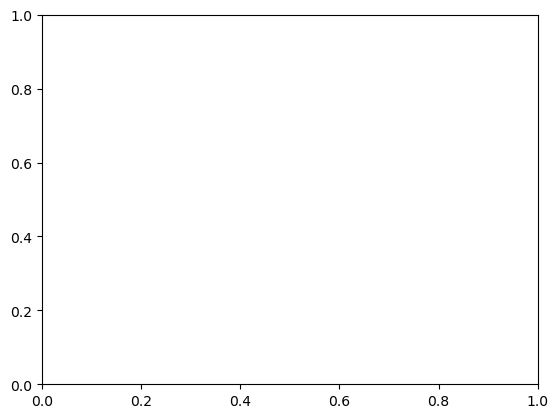

In [42]:
arm_assem=UCB(X-X[10])
for i in range(1):
    arm_assem.pull_everyarm()
lidx=np.where(arm_assem.arm_states[:,-1]!=-1)
print(lidx)
asnew=arm_assem.arm_states[lidx]
ucb=asnew[:,3]
lcb=asnew[:,4]
plot_error_bars(ucb[:30],lcb[:30])
ucb=arm_assem.arm_states[:,3]
lcb=arm_assem.arm_states[:,4]
plot_error_bars(ucb[:30],lcb[:30])


In [17]:
nbrs = NearestNeighbors(n_neighbors=28, algorithm='auto').fit(X)
A=nbrs.kneighbors(X, return_distance=False)
ls=A[10]

In [16]:
np.set_printoptions(threshold=np.inf)
np.sort(ls),lidx

(array([   4,    9,   10,   17,   28,   35,   46,   65,   83,  133,  170,
         243,  571,  576,  583,  585,  639,  679,  691, 1227, 1239, 1263,
        1326, 1339, 1352, 1359, 1427, 1581], dtype=int64),
 (array([   8,    9,   10,   17,   35,  576,  583,  585, 1263, 1278, 1339,
         1359, 1427, 1581], dtype=int64),))

In [8]:
fixed_var=100000000
def cal_CB(pull_num,var,delta,number_of_arms,MAX_PULL,mode='fit'):
    delta=delta/number_of_arms/(MAX_PULL)
    if mode=='fit':
        return np.sqrt(2*var*np.log(2/delta)/pull_num)
    if mode=='fixed':
        return np.sqrt(2*fixed_var*np.log(2/delta)/pull_num)
    return

In [6]:
import numpy as np
import pandas as pd
from tools import *
from sklearn.neighbors import NearestNeighbors
import time
from scipy.spatial import KDTree
from sklearn.neighbors import BallTree

In [9]:
def plot_error_bars(ucb_list, lcb_list):
    if len(ucb_list) != len(lcb_list):
        raise ValueError("UCB and LCB should share the same list length")
    values = [(ucb + lcb) / 2 for ucb, lcb in zip(ucb_list, lcb_list)]
    error_lower = [value - lcb for value, lcb in zip(values, lcb_list)]
    error_upper = [ucb - value for value, ucb in zip(values, ucb_list)]
    points = np.arange(len(values))
    plt.figure()
    plt.errorbar(points, values, yerr=[error_lower, error_upper], fmt='o', capsize=5, label='Points with LCB and UCB')
    plt.xlabel('Point Index')
    plt.ylabel('Value')
    plt.title('Error Bar Plot with LCB and UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

In [2]:
from scipy.special import perm, comb
((40)/41)**500

4.345775669373735e-06

In [1]:
import numpy as np
import scipy as sp
from sklearn.neighbors import NearestNeighbors
import time
from scipy.spatial import KDTree
from sklearn.neighbors import BallTree
from dis_utils import *